## -----------Start M2-Week 11 Assignment/14th Nov 2016------------------------------
<li><strong>Title:</strong> Module 2 / Week 11: Unsupervised Machine Learning -Kmeans   
<li><strong>Purpose:</strong>Unsupervised Machine Learning -Kmeans with iris Dataset 
<li><strong>Name:</strong>RAJESH ASHOK JAISWAL UIN:669012329
<li><strong>DATED:</strong>11/14/2016

#### Here I am going to import all required parameters and classifier

In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

### ---------------------------------Iris Dataset--------------------------------------------------

<li>Here I am going to load iris data from "online dataset" file into Local dataframe'Diris' and then into 'Tdata'
<li> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor
<li> Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

In [2]:
Diris = datasets.load_iris()
X = Diris.data
Tdata = pd.DataFrame(X)
Tdata.columns = Diris.feature_names

In [3]:
# Display Tdata Table and there Columns
Tdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Check Missing Value & Handle it

In [4]:
#will check is there any missing values
[col for col in Tdata.columns 
     if Tdata[col].isnull().any()]

[]

#### There is no missing values in Dataframe Tdata as per the output of step 4

In [5]:
#feature scaling and will fit all column value into one array on same measuring parameter.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_scaled

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

## -------------Ploting Elbow to find number of Cluster(k) for K-means ------------------
##Finding K!

I'm going to use this code to measure the average distortion, for a variety of cluster sizes. 

In [7]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

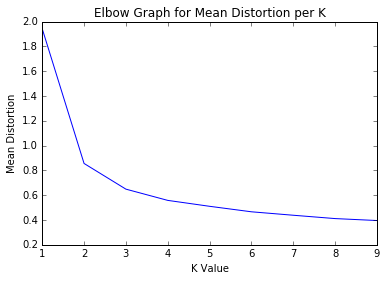

In [8]:
#Using Find function we are going to find proper nember of cluster
find_k(np.matrix(X), range(1,10),1)

#### Elbow is at 2 and 3 K value.
<li> So I can consider k as 2 but after learning about iris dataset I can say that it hold 3 different categories of Iris plant and also 3 is part of graph.
<li> consider K=3

In [9]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [10]:
Tdata['Iris Type'] = kmeans_model.labels_

In [11]:
Tdata.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Type
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [12]:
Tdata[Tdata['Iris Type'] == 0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Type
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
56,6.3,3.3,4.7,1.6,0
65,6.7,3.1,4.4,1.4,0
70,5.9,3.2,4.8,1.8,0
75,6.6,3.0,4.4,1.4,0
76,6.8,2.8,4.8,1.4,0
77,6.7,3.0,5.0,1.7,0
85,6.0,3.4,4.5,1.6,0


#### Opinion: This classification Was don onthe conbination of all columns 
<li> Main Classification of Iris was done on petal width.

#### Now I am going to plot above mantioned clusting on 3d Graph 

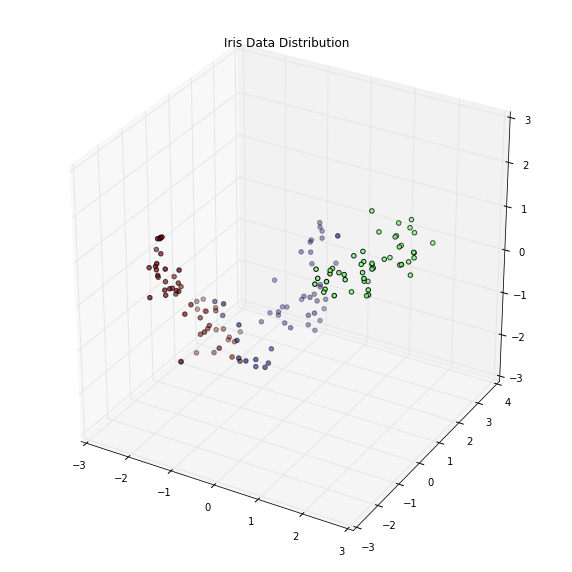

In [13]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=12, random_state=10)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:,2], c=kmeans_model.labels_)
# Axis names
plt.title("Iris Data Distribution")

#### Conclusion:
<li> Iris Data was distributed in 3 Clusters
<li> Green Data is of 'Iris Virginica'
<li> Blue Data is of 'Iris Setosa'
<li> Red Data is of 'Iris Versocolor'

### --------------------------------------End of original Assignment---------------------------------------